# **Expérimentation** d'exploitation du champ `product_specifications`

* C’est, pour chaque produit, un dictionnaire de caractéristiques.
* Cela revient à un corpus par caractéristique.
* On peut former des bigrammes Key_Value
* Cela après avoir normalisé à minima les deux
* Filtrage aisé des caractéristiques non discriminantes

## Normalisation des dictionnaires de caractéristiques

In [1]:
from flipkart_utils import get_dict_specs
specs = get_dict_specs()
print(specs.shape)
display(specs.head(3))

(1050,)


55b85ea15a1536d46b7190ad6fff8ce7    {'Brand': 'Elegance', 'Designed For': 'Door', ...
7b72c92c2f6c40268628ec5f14c6d590    {'Machine Washable': 'Yes', 'Material': 'Cotto...
64d5d4a258243731dc7bbb1eef49ad74    {'Material': 'Cotton Terry', 'Design': 'SHUVAM...
Name: dict_specs, dtype: object

,freq
Type,728
Brand,566
Sales Package,511
Color,503
Ideal For,468
...,...
What is shower cap?,1
Operational LED Lights,1
Other Indicators,1
Low Battery Indicator,1


<AxesSubplot:>

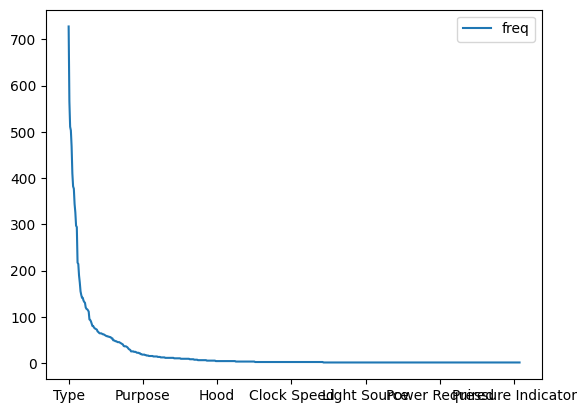

In [2]:
from flipkart_utils import get_key_freqs
keys_freqs = get_key_freqs(specs)
display(keys_freqs)
keys_freqs.plot()

## Seuillage fréquentiel et mise en forme normale (relationnelle)

Les propriétés qui n'apparaissent qu'une fois ne sont d'aucun intérêt.

Cela en fait déjà 265 sur 608 que l'on peut éliminer.

Mais le graphique ci-dessus montre un coude autour de la fréquence de 50.

Nous nous munissons d'un paramètre `thres` pour moduler ce seuil.

Fixé à 50, cela réduit notre ensemble à 60 propriétés.

In [3]:
thres = 50
display(keys_freqs[keys_freqs.freq <= thres].index)
display(keys_freqs[keys_freqs.freq > thres].index)

Index(['Box Material', 'Antennae', 'Designed For', 'Other Dimensions',
       'Wireless Speed', 'Thickness', 'Hand Washable', 'Sleeve',
       'Outer Material', 'Number of USB Ports',
       ...
       'Rack Included', 'Heat Resistant Valve Cap', 'Pressure Indicator',
       'Lid Type', 'Number of Shower Caps per Pack', 'What is shower cap?',
       'Operational LED Lights', 'Other Indicators', 'Low Battery Indicator',
       'Printed Text'],
      dtype='object', length=548)

Index(['Type', 'Brand', 'Sales Package', 'Color', 'Ideal For', 'Material',
       'Width', '_', 'Model Name', 'Weight',
       'Number of Contents in Sales Package', 'Height', 'Style Code',
       'Model Number', 'Model ID', 'Pack of', 'Length', 'Dial Shape',
       'Occasion', 'Strap Color', 'Size', 'Dial Color', 'Water Resistant',
       'Design', 'Pattern', 'Warranty Summary', 'Depth', 'Strap Material',
       'Suitable For', 'Diameter', 'Covered in Warranty',
       'Not Covered in Warranty', 'Microwave Safe', 'Fabric',
       'Machine Washable', 'Power Source', 'Series', 'Mug Capacity',
       'In The Box', 'Scratch Resistant', 'Mechanism',
       'Number of Contents in Set', 'Combo Set Content', 'Date Display',
       'Chronograph', 'Alarm Clock', 'Calendar', 'Altimeter', 'Luminous',
       'Novelty Feature', 'Clasp Type', 'Capacity', 'Barometer',
       'Water Resistance Depth', 'Freezer Safe', 'Warranty Service Type',
       'Compass', 'Strap Type', 'Case / Bezel Material', 'Mo

Commençons par les mettre en colonnes alignées et ordonnées par fréquence décroissante.

In [4]:
from flipkart_utils import get_top_specs
data = get_top_specs(specs, keys_freqs, thres)
display(data.head(3))

,Type,Brand,Sales Package,Color,Ideal For,Material,Width,_,Model Name,Weight,...,Clasp Type,Capacity,Barometer,Water Resistance Depth,Freezer Safe,Warranty Service Type,Compass,Strap Type,Case / Bezel Material,Model
55b85ea15a1536d46b7190ad6fff8ce7,Eyelet,Elegance,2 Curtains,Multicolor,None,Polyester,None,None,Abstract Polyester Door Curtain Set Of 2,None,...,None,None,None,None,None,None,None,None,None,None
7b72c92c2f6c40268628ec5f14c6d590,Bath Towel,Sathiyas,3 Bath Towel,"Red, Yellow, Blue","Men, Women, Boys, Girls",Cotton,60 inch,None,Sathiyas cotton bath towel,None,...,None,None,None,None,None,None,None,None,None,None
64d5d4a258243731dc7bbb1eef49ad74,Face Towel Set,Eurospa,20 PIECE FACE TOWEL SET,Assorted,"Boys, Girls, Men, Women",Cotton Terry,9 inch,None,SHUVAM20PCFTSETASSORTED,350 g,...,None,None,None,None,None,None,None,None,None,None


## Contenu de quelques caractéristiques

Explorons le contenu de quelques unes de ces propriétés :

In [5]:
display(data.Type.value_counts())

Analog                                  123
Mug                                      74
Ethnic                                   56
Wireless Without modem                   27
Religious Idols                          26
                                       ... 
Fitted and Flat                           1
Fingertip Pulse Oximeter                  1
Stroller                                  1
4G Routers                                1
Pigmented Polyvinyl Films (Imported)      1
Name: Type, Length: 149, dtype: int64

In [11]:
display(data.Brand.value_counts())

Lapguard                11
PRINT SHAPES            11
Lal Haveli              10
Aroma Comfort            8
Raymond                  8
Wallmantra               7
Tenda                    7
Smartpro                 7
Asus                     6
Home Originals           6
Sapatos                  5
Exotic India             5
Rega IT                  5
Edimax                   5
TRENDnet                 5
Netgear                  4
Cotonex                  4
TP-LINK                  4
HP                       4
Offspring                4
Rajasthan Crafts         4
The Intellect Bazaar     4
D-Link                   4
RRP                      3
Techone+                 3
S C Handicrafts          3
Welhouse                 3
Zyxel                    3
Tatvaarts                3
Hako                     3
KLIQVIK                  3
Rama                     3
FURNISHINGLAND           3
Digilight                3
Shoppingtara             3
Valtellina               3
eCraftIndia              3
M

In [35]:
display(data['Sales Package'].value_counts())

1 Mug                     49
1 Showpiece Figurine      44
1 mug                     22
Blanket                   12
1 Laptop Adapter          10
                          ..
8 curtains                 1
Face towel, Hand towel     1
6 bath towel               1
3 Vanity_box               1
2 Curtains                 1
Name: Sales Package, Length: 283, dtype: int64

In [36]:
display(data.Color.value_counts())

Multicolor      98
Black           73
White           42
Blue            31
Gold            28
                ..
Sky              1
Brown, White     1
Royalblue        1
Multi            1
Brown, Gold      1
Name: Color, Length: 80, dtype: int64

Il paraît ici à peu près évident que, même si l'on peut considérer ces specs comme faisant partie de la description d'un produit, leur caractère analytique recoupe fortement la catégorisation, et que son exploitation pourra être qualifiée de fuite de données.

## Formation du corpus à exploiter

Nous restons sur une normalisation *a minima* avec un *casefolding*.

Puis nous formons des bigrammes clé_valeur que nous assemblons en une phrase unique.

C'est ce corpus que nous fournirons en entrée à nos algorithmes de classification automatique.

### Apparition d'un problème

Je pense qu'il vient du fait que le dictionnaire brut ne respecte pas la règle d'unicité des clés.

On observe également un reliquat de problème de parsing avec un '"}' terminal qui apparaît ici et là.

In [12]:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if isinstance(data.iloc[i, j], list):
            print(i, j, data.iloc[i, j])

6 7 ['6 Months Warranty Against Manufacturing Defects.', 'Watch, Box, Camerii Card']
7 7 ['6 Months T STAR Warranty', 'Watch"}]']
8 7 [['1 Year Domestic Warranty', "Azan Times ( For All Cities Around The World ): Major Cities Around The World Are Pre-Programmed In The Watch. And Any Other Location Can Be Programmed Using Latitude, Longitude And Gmt Information. Azan Times Are Calculated Accurately, Alfajr Watch Uses The Local Taqweem Or The Most Widely Used Taq...View More Azan Times ( For All Cities Around The World ): Major Cities Around The World Are Pre-Programmed In The Watch. And Any Other Location Can Be Programmed Using Latitude, Longitude And Gmt Information. Azan Times Are Calculated Accurately, Alfajr Watch Uses The Local Taqweem Or The Most Widely Used Taqweem System For Your City. Other Standard Taqweem Systems Are Available., Prayer Reminders : Six Prayer Reminder Alarms Can Be Independently Set To Ring Before Or After Each Azan. All Prayer Reminder Alarms Will Automatica

In [10]:
display(data)
def casefold_elt(x):
    print(x)
    if x is None:
        return ""
    else:
        return x.casefold()
_data = data.applymap(casefold_elt)
display(_data)

,Type,Brand,Sales Package,Color,Ideal For,Material,Width,_,Model Name,Weight,...,Clasp Type,Capacity,Barometer,Water Resistance Depth,Freezer Safe,Warranty Service Type,Compass,Strap Type,Case / Bezel Material,Model
55b85ea15a1536d46b7190ad6fff8ce7,Eyelet,Elegance,2 Curtains,Multicolor,None,Polyester,None,None,Abstract Polyester Door Curtain Set Of 2,None,...,None,None,None,None,None,None,None,None,None,None
7b72c92c2f6c40268628ec5f14c6d590,Bath Towel,Sathiyas,3 Bath Towel,"Red, Yellow, Blue","Men, Women, Boys, Girls",Cotton,60 inch,None,Sathiyas cotton bath towel,None,...,None,None,None,None,None,None,None,None,None,None
64d5d4a258243731dc7bbb1eef49ad74,Face Towel Set,Eurospa,20 PIECE FACE TOWEL SET,Assorted,"Boys, Girls, Men, Women",Cotton Terry,9 inch,None,SHUVAM20PCFTSETASSORTED,350 g,...,None,None,None,None,None,None,None,None,None,None
d4684dcdc759dd9cdf41504698d737d8,Flat,SANTOSH ROYAL FASHION,"1 Bedsheet,2 Pillow Cover",Multicolor,None,Cotton,None,None,Gold Design Royal Cotton Printed Wedding and G...,None,...,None,None,None,None,None,None,None,None,None,None
6325b6870c54cd47be6ebfbffa620ec7,Flat,Jaipur Print,1 bed sheet 2 pillow cover,White,None,Cotton,None,waranty of the product only for manufacturing ...,jaipur117,900 g,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc,Self Adhesive,Oren Empower,Sheet Containing Set of Small Stickers,None,None,PVC Vinyl,60 cm,Reusable i.e. Can be used again after applied ...,None,290 g,...,None,None,None,None,None,None,None,None,None,None
fd6cbcc22efb6b761bd564c28928483c,Vinyl Sticker,Wallmantra,"1 Wall Decal/Sticker, 1 Practice Decal, Instru...",None,None,Vinyl,53 cm,If you have received a damaged or defective pr...,None,None,...,None,None,None,None,None,None,None,None,None,None
5912e037d12774bb73a2048f35a00009,Pigmented Polyvinyl Films (Imported),Uberlyfe,Sticker,None,None,Polyvinyl,260 cm,Leaves no sticky residue on walls. Can be appl...,None,None,...,None,None,None,None,None,None,None,None,None,None
c3edc504d1b4f0ba6224fa53a43a7ad6,Vinyl Sticker,Wallmantra,"1 Wall Decal/Sticker, 1 Practice Decal, Instru...",None,None,Vinyl,45 cm,If you have received a damaged or defective pr...,None,None,...,None,None,None,None,None,None,None,None,None,None


Eyelet
Bath Towel
Face Towel Set
Flat
Flat
Analog
Analog
Analog
Digital
Analog
Analog-Digital
Analog
Analog
Analog
Digital
Analog
Digital
Digital
Analog
Digital
Analog-Digital
Analog
Analog
Digital
Analog
Digital
Analog
Digital
Digital
Analog
Digital
Analog
Analog
None
None
Bath
None
Jug Glass Set
None
Square
Top and Pyjama Set
Square
Top and Pyjama Set
None
Mug
Mug
Mug
Range Extenders/Repeaters
Mug
None
Mug
Flexible Keyboard
Casserole Set
None
None
None
None
None
None
None
None
None
None
Bottle Cover
Mug
Mug
WATERPROOF
Table Cover
None
None
Bowl Set
Table Cover
Bottle
Basic Shorts
Basic Shorts
Denim Shorts
None
None
None
baby cap red checks
None
Fengshui
None
None
Garden Decor
Adhesive
Tawa
Visual Media
Coaster Set
Human Figurines
Religious Idols
Human Figurines
Religious Idols
Religious Idols
Human Figurines
Religious Idols
Human Figurines
Religious Idols
None
None
None
Religious Idols
Religious Idols
Quilts and Comforters
Quilts and Comforters
Dohar
Play Pool
Quilts and Comforters
Q

AttributeError: 'list' object has no attribute 'casefold'